## instructions

to download files, use `scp /home/lspiegel/tuplex-public/tuplex/build/stats/*.json <dest-dir>`

In [1]:
import pandas as pd
import json
import glob

In [4]:
!ls -l ../data/json_stats/ | wc -l

     100


In [7]:
rows = []
for path in glob.glob('../data/json_stats/*.json'):
    with open(path, 'r') as fp:
        rows.append(json.load(fp))

In [9]:
df = pd.DataFrame(rows)

In [19]:
# print some global stats
n_unique_general_case = len(df['general_case_type'].unique())
n_unique_normal_case = len(df['normal_case_type'].unique())

print('{}\tunique general case types\n{}\t'
'unique normal case types\n{}\tfiles'.format(n_unique_general_case, n_unique_normal_case, len(df)))

10	unique general case types
1	unique normal case types
99	files


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# plot out normal/general/fallback case distribution

In [44]:
df= df.sort_values(by='nrows')

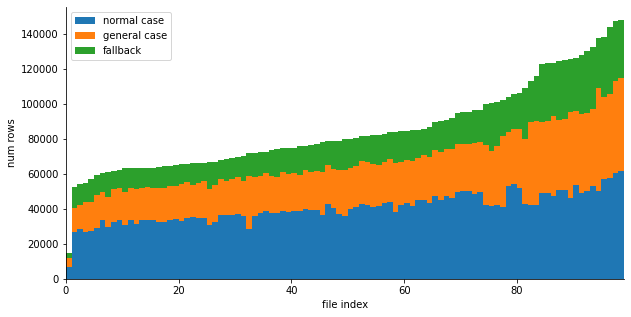

In [61]:
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
plt.bar(xq, df['normal_case_path_count'], width=1, linewidth=0, label='normal case')
plt.bar(xq, df['general_case_path_count'], width=1, linewidth=0,
        bottom=df['normal_case_path_count'], label='general case')
plt.bar(xq, df['fallback_case_path_count'], width=1, linewidth=0,
        bottom=df['normal_case_path_count'] + df['general_case_path_count'],
       label='fallback')
plt.ylabel('num rows')
plt.xlabel('file index')
plt.xlim(0, len(df))
plt.legend()
sns.despine()

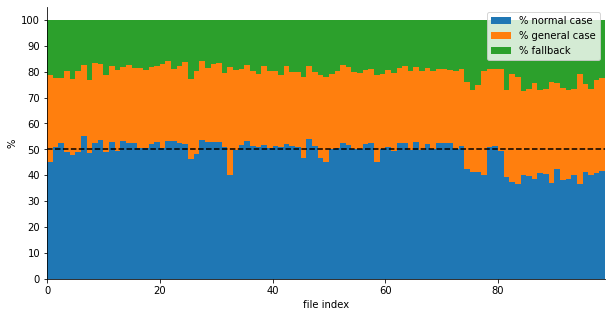

In [63]:
# same figure, but this time with percent
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
nrows = df['nrows'] * 0.01
plt.bar(xq, df['normal_case_path_count'] / nrows,
        width=1, linewidth=0, label='% normal case')
plt.bar(xq, df['general_case_path_count'] / nrows, label='% general case',
        width=1, linewidth=0, bottom=df['normal_case_path_count'] / nrows)
plt.bar(xq, df['fallback_case_path_count'] / nrows,
        width=1, linewidth=0, label='% fallback',
        bottom=df['normal_case_path_count'] / nrows + df['general_case_path_count'] / nrows)
plt.ylabel('%')
plt.xlabel('file index')
plt.axhline(50, color='k', linestyle='--')
plt.yticks(np.arange(0, 110, 10))
plt.xlim(0, len(df))
plt.legend()
sns.despine()

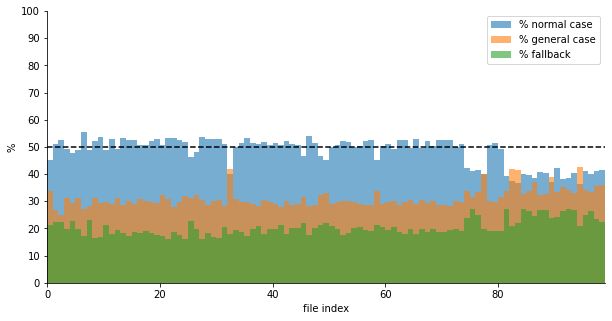

In [66]:
# same figure, but this time with percent
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
nrows = df['nrows'] * 0.01
alpha=.6
plt.bar(xq, df['normal_case_path_count'] / nrows,
        width=1, linewidth=0, label='% normal case', alpha=alpha)
plt.bar(xq, df['general_case_path_count'] / nrows, label='% general case',
        width=1, linewidth=0, alpha=alpha)
plt.bar(xq, df['fallback_case_path_count'] / nrows,
        width=1, linewidth=0, label='% fallback', alpha=alpha)
plt.ylabel('%')
plt.xlabel('file index')
plt.axhline(50, color='k', linestyle='--')
plt.yticks(np.arange(0, 110, 10))
plt.xlim(0, len(df))
plt.legend()
sns.despine()